In [4]:
# unit test
import unittest

from PIL import Image, ImageDraw

import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import math

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

%load_ext autoreload
%autoreload 2

# own module
from dataset.concept import PosNegConceptDataset, ClusterConceptDataset

['../helper', './helper', '/helper', 'helper', '../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
class UnitTestLoss(unittest.TestCase):

    def test_item_labelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../../results/tmp/masks_info_label.csv"]
        concepts_path = "C:/Users/Prinzessin/projects/decentnet/data/tmp/concepts"
        
        p_aug = 1 # augmentation probability = 1, cause of 2 crop tansform, we need both versions to be different
        
        pncd = PosNegConceptDataset(mode="train", channels=3, index_col=0, image_size=500, csv_filenames=csv_filenames, ci_concept=0, concepts_path=concepts_path, p_aug=p_aug)
        
        print(pncd.__len__())
        
        item = pncd.__getitem__(index=500)
        
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(item["img1"].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["img2"].permute(1, 2, 0), cmap="gray")
        

        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])

.
----------------------------------------------------------------------
Ran 1 test in 0.128s

OK


here template
           lbl_Scars  lbl_Hemorrhages  lbl_Exudates  lbl_Drusen  \
A0004_322        0.0              NaN           NaN         NaN   
A0004_200        0.0              NaN           NaN         NaN   
A0001_186        0.0              NaN           NaN         NaN   
A0001_9          0.0              NaN           NaN         NaN   
A0001_310        0.0              NaN           NaN         NaN   
...              ...              ...           ...         ...   
A0002_56         NaN              NaN           NaN         NaN   
A0001_36         NaN              NaN           NaN         NaN   
A0005_224        NaN              NaN           NaN         NaN   
A0005_278        NaN              NaN           NaN         NaN   
A0001_134        NaN              NaN           NaN         NaN   

           lbl_Other_Lesions  lbl_Optic_Disc  lbl_Vessels  lbl_cluster   mode  \
A0004_322                NaN             NaN          0.0            0  train   
A0004_200          

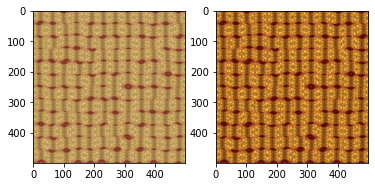

In [16]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)